Ingresa un numero entero que represente el numero de hosts que deseas generar 1500


1500
      hostname       os   enviroment  country  node
0     LTITA001    Linux      Testing    Italy     1
1     SIESP001  Solaris  Integration    Spain     1
2     STIRL001  Solaris      Testing  Ireland     1
3     LPESP001    Linux   Production    Spain     1
4     LTFRA001    Linux      Testing   France     1
...        ...      ...          ...      ...   ...
1495  HTIRL007    HP-UX      Testing  Ireland     7
1496  STDEU026  Solaris      Testing  Germany    26
1497  SPITA025  Solaris   Production    Italy    25
1498  APIRL025      AIX   Production  Ireland    25
1499  SPDEU032  Solaris   Production  Germany    32

[1500 rows x 5 columns]


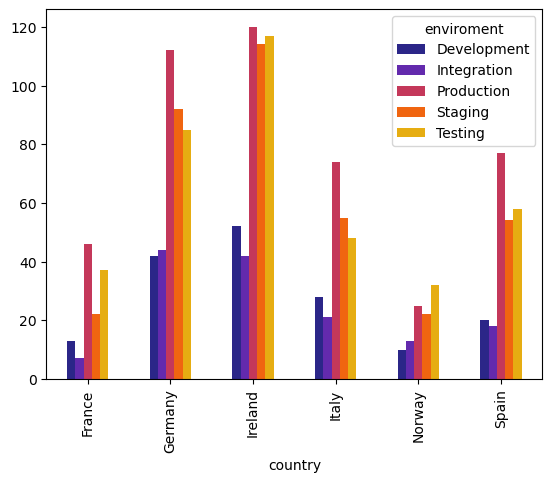

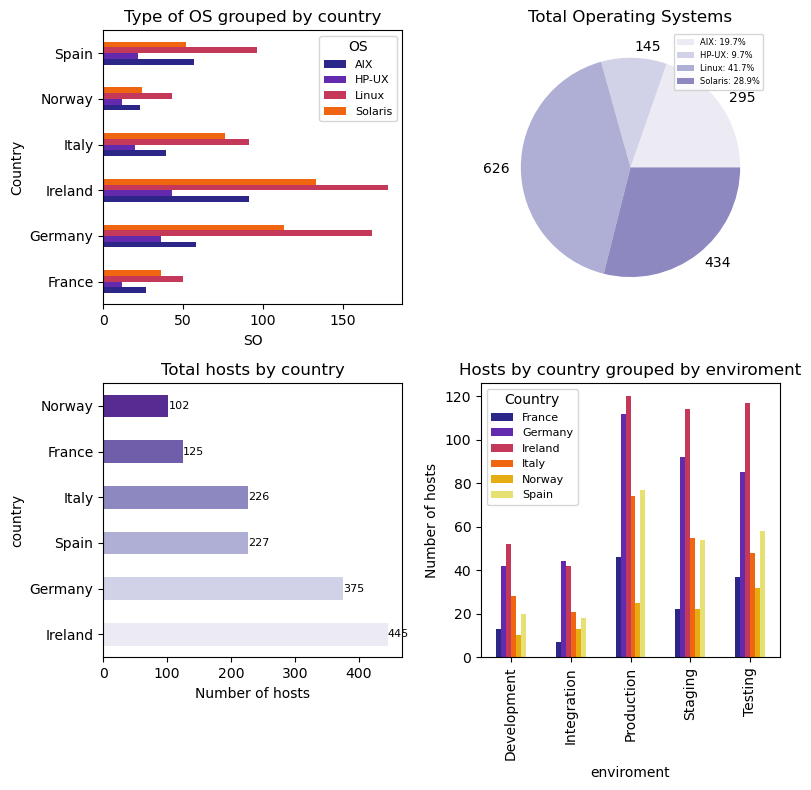

In [4]:
# TAREA PYTHON AVANZADO
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


def set_hostnames(number_of_hosts):

    number_of_hosts = int(number_of_hosts)
        
    so = ['L','S','A','H']
    
    sist_op = np.random.choice(so, size = number_of_hosts, p = [0.4, 0.3, 0.2, 0.1])
    
    env = ['D', 'I', 'T', 'S', 'P']
    
    entorno = np.random.choice(env, size = number_of_hosts, p = [0.1,0.1,0.25,0.25,0.3])
    entorno
    
    
    count = ['NOR','FRA','ITA','ESP','DEU', 'IRL']
    
    pais = np.random.choice(count, size = number_of_hosts, p = [0.06, 0.09, 0.16, 0.16, 0.23, 0.30])
    pais
    
    resultado = [f'{x}{y}{z}' for x,y,z in zip(sist_op,entorno,pais)]
    
    dict_contador = {}
    lista = []
    
    for everyword in resultado:
        if everyword not in dict_contador:
            dict_contador[everyword]= 0
        if dict_contador[everyword] < 999:
            dict_contador[everyword] += 1
            lista.append(f"{everyword}{str(dict_contador[everyword]).zfill(3)}")
        else:
            pass 
    return lista

def get_os(hostname):
    hostname = hostname[0]
    if hostname == 'L':
        L = 'Linux'
        return L
    if hostname == 'S':
        S = 'Solaris'
        return S
    if hostname == 'A':
        AIX = 'AIX'
        return AIX
    if hostname == 'H':
        HP_UX = 'HP-UX'
        return HP_UX

def get_enviroment(hostname):

    hostname = hostname[1]
    if hostname == 'D':
        D = 'Development'
        return D
    if hostname == 'I':
        I = 'Integration'
        return I
    if hostname == 'T':
        T = 'Testing'
        return T
    if hostname == 'S':
        S = 'Staging'
        return S
    if hostname == 'P':
        P = 'Production'
        return P
        

def get_country(hostname):

    hostname = hostname[2:5]
    if hostname == 'NOR':
        Norway = 'Norway'
        return Norway
    if hostname == 'DEU':
        Germany = 'Germany'
        return Germany
    if hostname == 'ITA':
        Italy = 'Italy'
        return Italy
    if hostname == 'ESP':
        Spain = 'Spain'
        return Spain
    if hostname == 'IRL':
        Ireland = 'Ireland'
        return Ireland
    if hostname == 'FRA':
        France = 'France'
        return France

dataset = []

def set_dataframe(count):
    global df
    hostnames = set_hostnames(count)
    for hostname in hostnames:
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname),
            'enviroment': get_enviroment(hostname),
            'country': get_country(hostname),
            'node': int(hostname[-3:])
        })
    df = pd.DataFrame(dataset)
    return df

def verif_digit(number_of_hosts):
    while number_of_hosts.isdigit() == False:
        number_of_hosts = input('Ingresa un numero entero que represente el numero de hosts que deseas generar')
    else:
        number_of_hosts = int(number_of_hosts)
        print(number_of_hosts)
        return number_of_hosts
        

def create_csv_(df):
    hosts_df = df.to_csv('hosts.csv', index= False, header = True)
    hosts_csv = r'hosts.csv'
    return hosts_csv
    
def read_csv_(csv_file):
    hosts_df = pd.read_csv(csv_file)
    hosts_df
    return hosts_df


#Peticion inicial

number_of_hosts = input('Ingresa un numero entero que represente el numero de hosts que deseas generar')
number_of_hosts = verif_digit(number_of_hosts)
hdf = set_dataframe(number_of_hosts)
print(hdf)
create_csv_(df)
hosts_csv = create_csv_(df)
read_csv_(hosts_csv)
csv = read_csv_(hosts_csv)


co_env = hdf.groupby(['country','enviroment']).size().unstack()
co_env.plot(kind='bar', color = sb.color_palette(palette='CMRmap'))

os_c = hdf.groupby(['country','os']).size().unstack()

os_counts = df.groupby("os").size()
total_count = os_counts.sum()

country_v = hdf['country'].value_counts()

total_henv=hdf.groupby(['enviroment','country'])['hostname'].size().unstack()

fig,axs = plt.subplots(2,2, figsize =(8,8))

#primer graf
os_c.plot(kind='barh', ax=axs[0, 0], color = sb.color_palette(palette='CMRmap'))
axs[0, 0].set_title('Type of OS grouped by country')
axs[0,0].legend(fontsize='small', loc = 'upper right', prop = {'size':8}, title='OS')
axs[0, 0].set_xlabel('SO')
axs[0, 0].set_ylabel('Country')

#segundo graf

#etiqueta para el grafico
labels = [str(count) for count in os_counts]

os_counts.plot(kind='pie', ax=axs[0, 1],labels = labels, colors = sb.color_palette(palette='Purples'))


#Crear etiquetas para la leyenda con porcentajes
legend_labels = [f"{os}: {pct:.1f}%" for os, pct in zip(os_counts.index, (os_counts / total_count) * 100)]

#Añadir la leyenda en la esquina superior derecha
axs[0, 1].legend(
    legend_labels,
    fontsize='small',
    loc='upper right',
    prop={'size': 6})
axs[0, 1].set_title("Total Operating Systems")


#tercer graf
host_country_graph = country_v.plot(kind='barh', ax=axs[1,0], color = sb.color_palette(palette='Purples'))
for container in host_country_graph.containers:
    host_country_graph.bar_label(container, fmt='%.0f', label_type='edge', fontsize=8)
axs[1,0].plot()
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_xlabel('Number of hosts')

#cuarto graf
total_henv.plot(kind = 'bar', ax = axs[1,1], color = sb.color_palette(palette='CMRmap'))
axs[1,1].legend(fontsize='small', loc = 'upper left', prop = {'size':8}, title='Country')
axs[1,1].set_title('Hosts by country grouped by enviroment')
axs[1,1].set_ylabel('Number of hosts')

fig.tight_layout()